# Autoregressive Moving Average (ARMA) Models


## The Purely Random Process

A purely random process (also known as a white noise process) is a stochastic process where the value at time $t$, denoted as $e_t$ is uncorrelated with its past values and has a constant mean and variance.

$$
E(e_t) = 0, \\
Var(e_t) = E(e_t^2) = \sigma^2 \\ 
Cov(e_t, e_{t-k}) = E(e_t e_{t-k}) = 0 \text{ for } k \neq 0
$$

It is a stationary process since its statistical properties (level, fluctuations and autocorrelation) do not change over time.

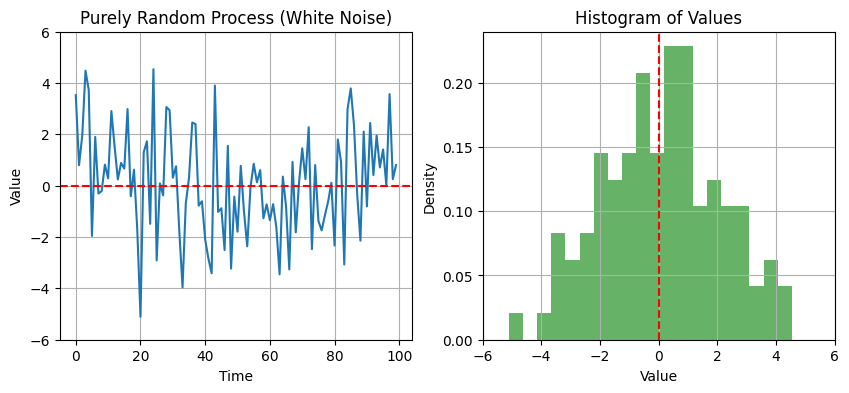

In [19]:
# A purely random process with a standard deviation of 1

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

e = np.random.normal(loc = 0, scale=2, size=100)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(e)
ax[0].set_title("Purely Random Process (White Noise)")
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_ylim(-6, 6)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].grid()

ax[1].hist(e, bins=20, density=True, alpha=0.6, color='g')
ax[1].set_title("Histogram of Values")
ax[1].set_xlim(-6, 6)
ax[1].axvline(0, color='red', linestyle='--')
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Density")
ax[1].grid()

Text(0.5, 1.0, 'Auto-correlation of White Noise')

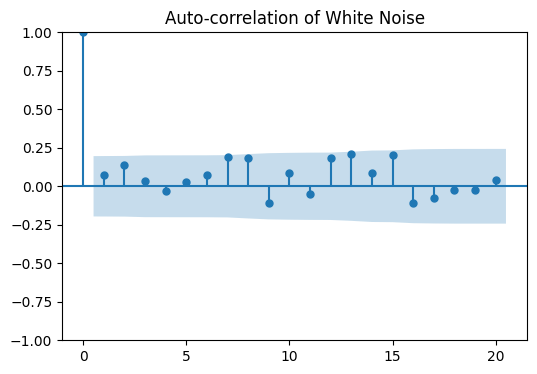

In [20]:
# Auto-correlation
from statsmodels.graphics.tsaplots import plot_acf

fig_acf, ax_acf = plt.subplots(figsize=(6, 4))
plot_acf(e, lags=20, ax=ax_acf)
ax_acf.set_title("Auto-correlation of White Noise")

## Autoregressive Processes (AR)

An autoregressive process of order $p$, denoted as AR($p$), is a stochastic process where the current value of the series is expressed as a linear combination of its previous $p$ values and a random error term.

$$
x_t = \phi_0 + \phi_1 x_{t-1} + \phi_2 x_{t-2} + ... + \phi_p x_{t-p} + e_t
$$

where:
- $x_t$ is the value of the series at time $t$,
- $\phi_1, \phi_2, ..., \phi_p$ are the parameters of the model,
- $e_t$ is a white noise error term with mean zero and constant variance $\sigma^2$.

## The AR(1) Process

The simplest autoregressive process is the AR(1) process, where the current value depends only on its immediate past value.

$$
x_t = \phi_0 + \phi_1 x_{t-1} + e_t
$$

In the discussion about difference equations, we saw that the AR(1) is stable if $|\phi| < 1$. What about the statistical properties of the AR(1) process?

$$
E(x_t) = \phi_0 + \phi_1 E(x_{t-1}) + E(e_t) \\
$$


If the process is stationary (i.e., $E(x_t) = E(x_{t-1})$), then the mean of the AR(1) process is zero. If 
the process is stationary, then we can solve the equation for the expected value:

$$
E(x_t) = \frac{\phi_0}{1 - \phi_1}
$$

We can calculate the variance of the AR(1) by assuming that $\phi_0 = 0$. This simplifies the calculations without loss of generality.

$$
\begin{align*}
\gamma(0) & = Var(x_t) \\ 
& = E(x_t^2) - [E(x_t)]^2 \\
& = E[(\phi_1 x_{t-1} + e_t)^2] \\
& = E[\phi_1^2 x_{t-1}^2 + 2 \phi_1 x_{t-1} e_t + e_t^2] \\
& = \phi_1^2 E(x_{t-1}^2) + 2 \phi_1 E(x_{t-1} e_t) + E(e_t^2) \\
& = \phi_1^2 Var(x_{t-1}) + \sigma^2 \\
\end{align*}
$$

Again, assuming stationarity ($Var(x_t) = Var(x_{t-1})$), we can solve for the variance:

$$
Var(x_t) = \frac{\sigma^2}{1 - \phi_1^2}
$$

The covariances can be derived similarly by assuming that the constant is zero and taking the expected value of the product $x_t$ and $x_{t-k}$:

$$
\begin{align*}
\gamma(1) = Cov(x_t, x_{t-1}) & = E(x_t x_{t-1})\\
& = E[(\phi_1 x_{t-1} + e_t)x_{t-1}] \\
& = \phi_1 E(x_{t-1}^2) + E(e_t x_{t-1}) \\
& = \phi_1 Var(x_{t-1}) + 0 \\
& = \phi_1 Var(x_{t-1}) \\
& = \phi_1 Var(x_t) \\
\end{align*}
$$

For $k = 2$, we have:

$$
\begin{align*}
\gamma(2) = Cov(x_t, x_{t-2}) & = E(x_t x_{t-2})\\
& = E[(\phi_1 x_{t-1} + e_t)x_{t-2}] \\
& = \phi_1 E(x_{t-1} x_{t-2}) + E(e_t x_{t-2}) \\
& = \phi_1 \gamma(1) + 0 \\
& = \phi_1^2 \gamma(0) \\
\end{align*}
$$

Continuing this process, we find that for any lag $k$:

$$
\gamma(k) = \phi_1^k Var(x_t)
$$

The autocorrelation function (ACF) is obtained by normalizing the covariances by the variance:

$$
\rho(k) = \frac{\gamma(k)}{\gamma(0)} = \phi_1^k
$$


For an AR(p) process the expressions for the mean, variance, and autocovariances are more complex and involve solving a system of equations known as the Yule-Walker equations.

1. Assume a zero mean for simplicity.

$$
x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + ... + \phi_p x_{t-p} + e_t
$$

The first Yule-Walker equation is for the variance:

$$
\begin{align*}
\gamma(0) & = E(x_t (\phi_1 x_{t-1} + \phi_2 x_{t-2} + ... + \phi_p x_{t-p} + e_t)) \\
& = \phi_1 E(x_t x_{t-1}) + \phi_2 E(x_t x_{t-2}) + ... + \phi_p E(x_t x_{t-p}) + E(x_t e_t) \\
& = \phi_1 \gamma(1) + \phi_2 \gamma(2) + ... + \phi_p \gamma(p) + \sigma^2 \\
\end{align*}
$$

The next equation is for the autocovariance at lag 1:

$$
\begin{align*}
\gamma(1) & = E(x_{t-1} (\phi_1 x_{t-1} + \phi_2 x_{t-2} + ... + \phi_p x_{t-p} + e_t)) \\
& = \phi_1 E(x_{t-1} x_{t-1}) + \phi_2 E(x_{t-1} x_{t-2}) + ... + \phi_p E(x_{t-1} x_{t-p}) + E(x_{t-1} e_t) \\
& = \phi_1 \gamma(0) + \phi_2 \gamma(1) + ... + \phi_p \gamma(p-1) + 0 \\
\end{align*}
$$


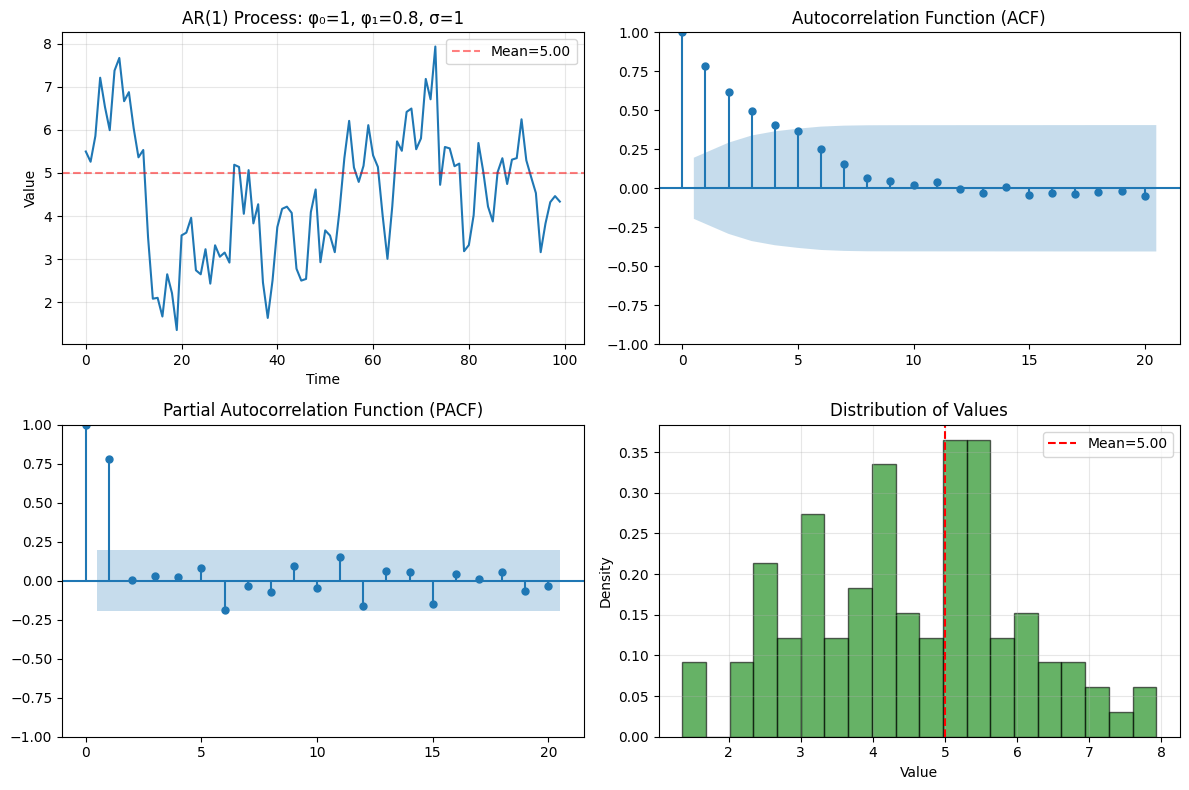

Sample statistics:
  Mean: 4.5073
  Variance: 2.1217

Theoretical properties:
  Mean: 5.0000
  Variance: 2.7778
  ACF at lag k: ρ(k) = φ₁^k = 0.8^k


In [33]:
# Simulate AR(1) process with phi_0 = 1, phi_1 = 0.8, sigma = 1

from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_pacf

np.random.seed(42)

# AR(1) parameters
phi_0 = 1  # constant term
phi_1 = 0.8  # AR coefficient
sigma = 1  # standard deviation of noise
n = 100

# For arma_generate_sample:
# ar parameter: [1, -phi_1] (note the negative sign for the lag polynomial)
# ma parameter: [1] for no MA component
ar = np.array([1, -phi_1])
ma = np.array([1])

# Generate AR(1) sample
x = arma_generate_sample(ar, ma, nsample=n, scale=sigma)

# Add the constant term to achieve the correct mean
# Mean of AR(1) is phi_0 / (1 - phi_1)
mean_ar1 = phi_0 / (1 - phi_1)
x = x + mean_ar1

# Plot the AR(1) process
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Time series plot
ax[0, 0].plot(x)
ax[0, 0].set_title(f"AR(1) Process: φ₀={phi_0}, φ₁={phi_1}, σ={sigma}")
ax[0, 0].axhline(mean_ar1, color='red', linestyle='--', alpha=0.5, label=f'Mean={mean_ar1:.2f}')
ax[0, 0].set_xlabel("Time")
ax[0, 0].set_ylabel("Value")
ax[0, 0].grid(alpha=0.3)
ax[0, 0].legend()

# ACF plot
plot_acf(x, lags=20, ax=ax[0, 1])
ax[0, 1].set_title("Autocorrelation Function (ACF)")

# PACF plot
plot_pacf(x, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("Partial Autocorrelation Function (PACF)")

# Histogram
ax[1, 1].hist(x, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
ax[1, 1].set_title("Distribution of Values")
ax[1, 1].axvline(mean_ar1, color='red', linestyle='--', label=f'Mean={mean_ar1:.2f}')
ax[1, 1].set_xlabel("Value")
ax[1, 1].set_ylabel("Density")
ax[1, 1].legend()
ax[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Theoretical properties
theoretical_mean = phi_0 / (1 - phi_1)
theoretical_var = sigma**2 / (1 - phi_1**2)

print(f"Sample statistics:")
print(f"  Mean: {np.mean(x):.4f}")
print(f"  Variance: {np.var(x):.4f}")
print(f"\nTheoretical properties:")
print(f"  Mean: {theoretical_mean:.4f}")
print(f"  Variance: {theoretical_var:.4f}")
print(f"  ACF at lag k: ρ(k) = φ₁^k = {phi_1}^k")

## The Partial Autocorrelation Function (PACF)

The partial autocorrelation function (PACF) measures the correlation between a time series and its lagged values, after removing the effects of intervening lags. In other words, it quantifies the direct relationship between $x_t$ and $x_{t-k}$, controlling for the influence of all intermediate lags ($x_{t-1}, x_{t-2}, ..., x_{t-(k-1)}$).

To see this, consider a regression model for 

$$
\text{income}_i = \beta_0 + \beta_1 \text{age}_{i} + \beta_2 \text{experience}_{i} + e_i 
$$

In [34]:
import pandas as pd

dt = pd.read_csv("https://raw.githubusercontent.com/febse/data/refs/heads/main/ts/multiple_linear_regression_dataset_age_income_experience.csv")
dt.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [50]:
from statsmodels.regression.linear_model import OLS

model = OLS(dt['income'], dt[['age', 'experience']]).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 income   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              283.2
Date:                 вт, 04 ное 2025   Prob (F-statistic):                    2.49e-14
Time:                        15:41:45   Log-Likelihood:                         -206.27
No. Observations:                  20   AIC:                                      416.5
Df Residuals:                      18   BIC:                                      418.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          746.1452     94.274      7.915      0.000     548.083     944.207
experience  1532.0108    521.012      2.940      0.009     437.406    2626.615
==============================================================================
Omnibus:                        2.210   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.128
Skew:                          -0.158   Prob(JB):                        0.569
Kurtosis:                       1.880   Cond. No.                         12.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model2 = OLS(dt["income"], dt["age"]).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 income   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              397.7
Date:                 вт, 04 ное 2025   Prob (F-statistic):                    3.35e-14
Time:                        15:41:48   Log-Likelihood:                         -210.20
No. Observations:                  20   AIC:                                      422.4
Df Residuals:                      19   BIC:                                      423.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          994.1846     49.850     19.943      0.000     889.847    1098.522
==============================================================================
Omnibus:                        3.802   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.880
Skew:                          -0.922   Prob(JB):                        0.237
Kurtosis:                       2.763   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Understanding Partial Correlation through Regression

Notice that in the multiple regression model above, the coefficient for `age` is **99.78**. However, when we regress `income` on `age` alone (without controlling for `experience`), the coefficient is different. This is because in the simple regression, the age coefficient captures both:
1. The direct effect of age on income
2. The indirect effect through experience (since age and experience are correlated)

The **partial correlation** isolates the direct effect by removing the influence of the intermediate variable.

This concept directly applies to the **Partial Autocorrelation Function (PACF)** in time series:
- $\rho(k)$ (ACF at lag k) measures the total correlation between $x_t$ and $x_{t-k}$
- $\phi_{kk}$ (PACF at lag k) measures the direct correlation between $x_t$ and $x_{t-k}$, after removing the effects of $x_{t-1}, x_{t-2}, ..., x_{t-(k-1)}$

For an AR(1) process, only the first lag has a direct effect, so the PACF cuts off after lag 1 (just like age has a direct effect on income, but the effect through experience can be separated out).

In [52]:
# Illustrate partial correlation concept
print("=" * 60)
print("COMPARING TOTAL vs PARTIAL EFFECTS")
print("=" * 60)

# Extract coefficients
age_coef_multiple = model.params['age']
age_coef_simple = model1.params.iloc[0]  # Simple regression coefficient
exp_on_age_coef = model2.params.iloc[0]  # Experience regressed on age

print(f"\n1. Multiple Regression (controlling for experience):")
print(f"   Income = {model.params[0]:.2f} + {age_coef_multiple:.2f}*age + {model.params['experience']:.2f}*experience")
print(f"   Age coefficient: {age_coef_multiple:.2f} (PARTIAL effect)")

print(f"\n2. Simple Regression (NOT controlling for experience):")
print(f"   Income = {model1.params.iloc[0]:.2f}*age")
print(f"   Age coefficient: {age_coef_simple:.2f} (TOTAL effect)")

print(f"\n3. Experience vs Age:")
print(f"   Experience = {model2.params.iloc[0]:.2f}*age")
print(f"   Correlation coefficient: {exp_on_age_coef:.4f}")

print(f"\n4. Interpretation:")
print(f"   - Total effect of age ({age_coef_simple:.2f}) includes:")
print(f"     a) Direct effect on income ({age_coef_multiple:.2f})")
print(f"     b) Indirect effect through experience")
print(f"   - Age and experience are correlated (r = {dt['age'].corr(dt['experience']):.4f})")
print(f"   - The partial effect removes the confounding influence")

print("\n" + "=" * 60)
print("ANALOGY TO TIME SERIES (PACF)")
print("=" * 60)
print("\nFor AR(1): x_t = φ₁*x_{t-1} + e_t")
print("  - ACF(k) = φ₁^k  (total correlation, decays exponentially)")
print("  - PACF(1) = φ₁   (direct effect)")
print("  - PACF(k) = 0 for k>1 (no direct effect after lag 1)")
print("\nJust like age affects income directly AND through experience,")
print("x_{t-2} affects x_t through x_{t-1}, not directly in AR(1)!")

COMPARING TOTAL vs PARTIAL EFFECTS

1. Multiple Regression (controlling for experience):
   Income = 746.15 + 746.15*age + 1532.01*experience
   Age coefficient: 746.15 (PARTIAL effect)

2. Simple Regression (NOT controlling for experience):
   Income = 994.18*age
   Age coefficient: 994.18 (TOTAL effect)

3. Experience vs Age:
   Experience = 994.18*age
   Correlation coefficient: 994.1846

4. Interpretation:
   - Total effect of age (994.18) includes:
     a) Direct effect on income (746.15)
     b) Indirect effect through experience
   - Age and experience are correlated (r = 0.6152)
   - The partial effect removes the confounding influence

ANALOGY TO TIME SERIES (PACF)

For AR(1): x_t = φ₁*x_{t-1} + e_t
  - ACF(k) = φ₁^k  (total correlation, decays exponentially)
  - PACF(1) = φ₁   (direct effect)
  - PACF(k) = 0 for k>1 (no direct effect after lag 1)

Just like age affects income directly AND through experience,
x_{t-2} affects x_t through x_{t-1}, not directly in AR(1)!


/tmp/ipykernel_19083/2841804070.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   Income = {model.params[0]:.2f} + {age_coef_multiple:.2f}*age + {model.params['experience']:.2f}*experience")


In [48]:
model2 = OLS(dt["experience"], dt["age"]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             experience   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              76.30
Date:                 вт, 04 ное 2025   Prob (F-statistic):                    4.44e-08
Time:                        15:40:10   Log-Likelihood:                         -52.253
No. Observations:                  20   AIC:                                      106.5
Df Residuals:                      19   BIC:                                      107.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1619      0.019      8.735      0.000       0.123       0.201
==============================================================================
Omnibus:                        1.490   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.049
Skew:                           0.545   Prob(JB):                        0.592
Kurtosis:                       2.736   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Moving Average (MA) Processes

A simple moving average process of order $q$, denoted as MA(q), is defined as:

$$
x_t = e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q}
$$

where:
- $x_t$ is the value of the time series at time $t$.
- $e_t$ is a white noise error term at time $t$.
- $\theta_1, \theta_2, ..., \theta_q$ are the parameters of the model.

The moving average process of order 1 only includes the immediate past error term:

$$
x_t = e_t + \theta_1 e_{t-1}
$$

The expected value of this process is zero, because it is a linear combination of white noise terms, each of which has an expected value of zero.

$$
E(x_t) = E(e_t) + \theta_1 E(e_{t-1}) = 0 + \theta_1 \cdot 0 = 0
$$

We can calculate its variance by using the result that its mean is zero (see above). 

$$
\begin{align*}
Var(x_t) & = E(x_t^2) \\
         & = E\left((e_t + \theta_1 e_{t-1})^2\right) \\
         & = E\left(e_t^2 + 2\theta_1 e_t e_{t-1} + \theta_1^2 e_{t-1}^2\right) \\
         & = E(e_t^2) + 2\theta_1 E(e_t e_{t-1}) + \theta_1^2 E(e_{t-1}^2) \\        
         & = \sigma^2 + 2\theta_1 \cdot 0 + \theta_1^2 \sigma^2 \\
         & = (1 + \theta_1^2) \sigma^2
\end{align*}
$$

Its autocovariance function (ACF) at lag $k = 1$ is given by:

$$
\begin{align*}
\gamma(1) & = Cov(x_t, x_{t-1}) \\
          & = E\left[(x_t - E(x_t))(x_{t-1} - E(x_{t-1}))\right] \\
          & = E(x_t x_{t-1}) \\
          & = E\left[(e_t + \theta_1 e_{t-1})(e_{t-1} + \theta_1 e_{t-2})\right] \\
          & = E\left[e_t e_{t-1} + \theta_1 e_t e_{t-2} + \theta_1 e_{t-1}^2 + \theta_1^2 e_{t-1} e_{t-2}\right] \\
          & = 0 + \theta_1 \cdot 0 + \theta_1 \sigma^2 + \theta_1^2 \cdot 0 \\
          & = \theta_1 \sigma^2
\end{align*}
$$

Its autocovariance function (ACF) at lag $k > 1$ is zero, see for example lag $k = 2$ below:

$$
\begin{align*}
\gamma(2) & = E(x_t x_{t-2}) \\
          & =  E\left[(e_t + \theta_1 e_{t-1})(e_{t-1} + \theta_1 e_{t-2})\right] \\
          & = E\left[e_t e_{t-2} + \theta_1 e_{t-1} e_{t-2} + \theta_1 e_t e_{t-1} + \theta_1^2 e_{t-1} e_{t-2}\right] \\
          & = 0 + \theta_1 \cdot 0 + \theta_1 \cdot 0 + \theta_1^2 \cdot 0 \\
          & = 0
\end{align*}          
$$


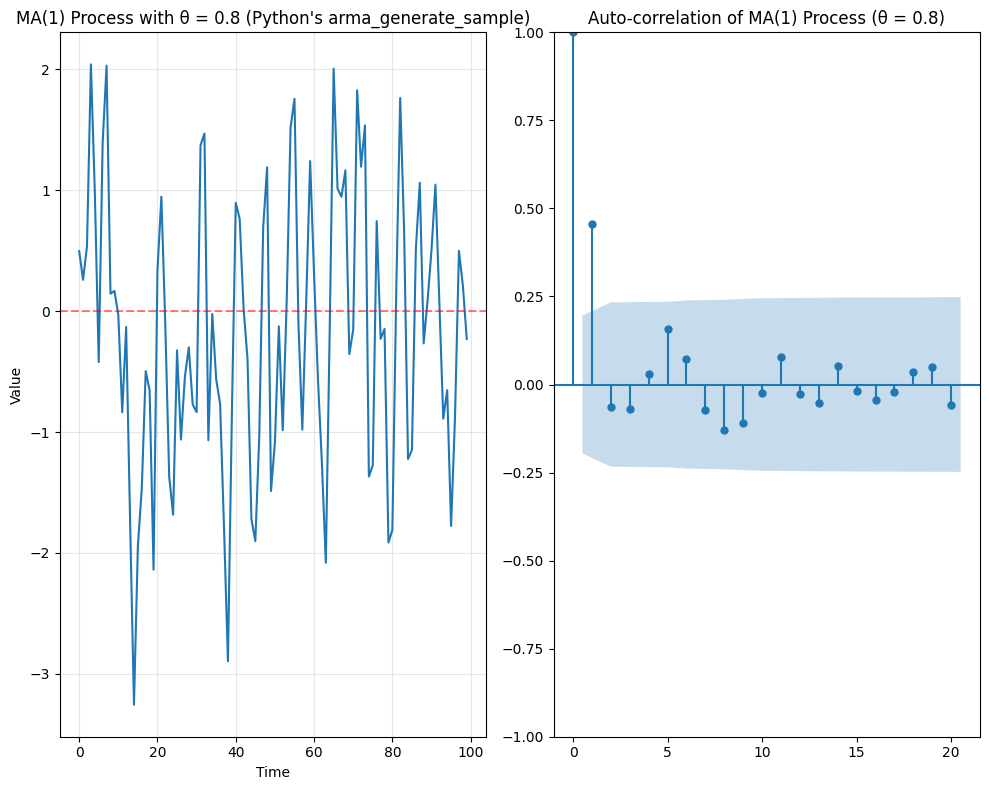

Mean of MA(1) process: -0.1850
Variance of MA(1) process: 1.3120
Theoretical variance: 1.6400
Theoretical ACF at lag 1: 0.4878


In [ ]:
# Simulate MA(1) process with theta = 0.8, sigma = 1

from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(42)

# MA(1) parameters
theta = 0.8
n = 100

# Generate MA(1) sample
x = arma_generate_sample(ar=[1], ma=[1, theta], nsample=n, scale=1)

# Plot the MA(1) process
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].plot(x)
ax[0].set_title(f"MA(1) Process with θ = {theta} (Python's arma_generate_sample)")
ax[0].axhline(0, color='red', linestyle='--', alpha=0.5)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].grid(alpha=0.3)

# Plot ACF
plot_acf(x, lags=20, ax=ax[1])
ax[1].set_title(f"Auto-correlation of MA(1) Process (θ = {theta})")

plt.tight_layout()
plt.show()

print(f"Mean of MA(1) process: {np.mean(x):.4f}")
print(f"Variance of MA(1) process: {np.var(x):.4f}")
print(f"Theoretical variance: {1 + theta**2:.4f}")
print(f"Theoretical ACF at lag 1: {theta / (1 + theta**2):.4f}")